In [ ]:
# $$ 환경설정

# 가. 기본 패키지
import os
import pandas as pd
import numpy as np

# 나. 그래픽 
import matplotlib.pyplot as plt
import seaborn as sns

# 다. 통계모형
import tensorflow as tf
import tensorflow_probability as tfp
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices 
# (주석) scipy.stats : 수치해석, 확률분포 분석 
# (주석) statsmodels : 회귀분석
# (주석) patsy : 회귀분석 전처리 패키지, dmatrices : design matrix, 자동으로 intercept (bias) column 생성

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# $$ 구들 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/시립대/2학기/도시모빌리티/기말"

/content/drive/MyDrive/시립대/2학기/도시모빌리티/기말


In [ ]:
# $$ 분석 데이터 경로 확인
os.getcwd()

'/content/drive/MyDrive/시립대/2학기/도시모빌리티/기말'

In [ ]:
# $$ 분석데이터 설정

# 가. 분석 데이터 불러오기
dataset=pd.read_csv('rdata_train.csv')
print(dataset.head())
print("------------------------------")

# 나. 분석데이터 컬럼명 변경
dataset=dataset.rename(columns={'x.1':'x1','x.2':'x2','x.3':'x3'})
print(dataset.head())
print("------------------------------")

# 다. 개발데이터와 테스트 데이터 설정
np.random.seed(1234)
sampling = np.random.rand(len(dataset)) < 0.8 # 개발데이타 비중 80%
train_set = dataset[sampling] # 개발 데이터
test_set = dataset[~sampling] # 테스트 데이터
print(f'train_set length is {len(train_set)}')
print(f'test_set length is {len(test_set)}')
print("------------------------------")
print(train_set.info())

   acc       x.1       x.2       x.3
0   42 -0.929444  0.031052 -0.055024
1   66  0.192897  0.194481  0.725021
2   50 -0.169364  0.011686 -0.669170
3   53 -0.846206 -0.227801  0.240856
4   49  0.056098 -0.147804 -0.415337
------------------------------
   acc        x1        x2        x3
0   42 -0.929444  0.031052 -0.055024
1   66  0.192897  0.194481  0.725021
2   50 -0.169364  0.011686 -0.669170
3   53 -0.846206 -0.227801  0.240856
4   49  0.056098 -0.147804 -0.415337
------------------------------
train_set length is 82
test_set length is 18
------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   acc     82 non-null     int64  
 1   x1      82 non-null     float64
 2   x2      82 non-null     float64
 3   x3      82 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.2 KB
None


             acc         x1         x2         x3
count  82.000000  82.000000  82.000000  82.000000
mean   49.353659   0.018510   0.026812  -0.031704
std     7.511920   0.572188   0.560272   0.590244
min    33.000000  -0.938487  -0.976481  -0.977320
25%    44.250000  -0.395657  -0.451203  -0.505549
50%    49.000000  -0.003181   0.063697  -0.053452
75%    53.000000   0.542183   0.458295   0.453448
max    68.000000   0.951315   0.998911   0.981320
------------------------------


Text(0.5, 1.0, 'x3')

<Figure size 432x288 with 0 Axes>

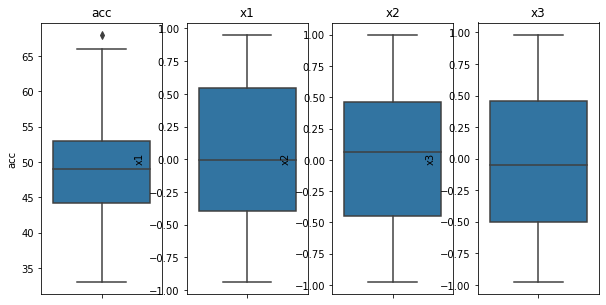

In [ ]:
# $$ 개발데이터 탐색

# 가. 게빌데이터 기술통계
print(train_set.describe())
print("------------------------------")

# 나. 주요 변수 박스플롯
# 그래프 구성 및 사이즈 설정 
fig = plt.figure()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.set_size_inches(10,5)

# 박스플롯
sns.boxplot(y='acc', data=train_set, ax=ax1)
ax1.set_title('acc')
sns.boxplot(y='x1', data=train_set, ax=ax2)
ax2.set_title('x1')
sns.boxplot(y='x2', data=train_set, ax=ax3)
ax3.set_title('x2')
sns.boxplot(y='x3', data=train_set, ax=ax4)
ax4.set_title('x3')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


skewness :  0.31972196490303634


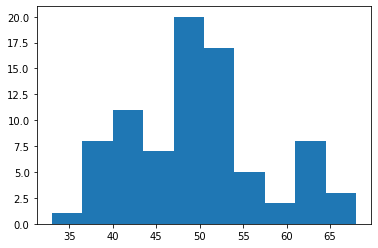

In [ ]:
# 다. 종속변수 히스토그램
# 도수분포 
train_set['cnt'] = 1
freq_table = train_set.pivot_table(columns='acc', values='cnt', aggfunc='sum')

# 히스토그램
plt.hist(train_set['acc'])

# 왜도
print('skewness : ', train_set['acc'].skew())

          acc        x1        x2        x3
acc  1.000000 -0.136636  0.128418 -0.028942
x1  -0.136636  1.000000 -0.032578 -0.053450
x2   0.128418 -0.032578  1.000000 -0.005497
x3  -0.028942 -0.053450 -0.005497  1.000000
------------------------------


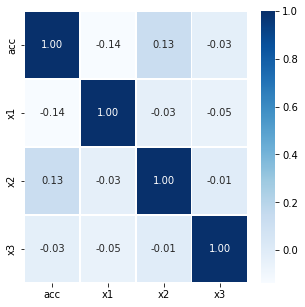

<Figure size 720x720 with 0 Axes>

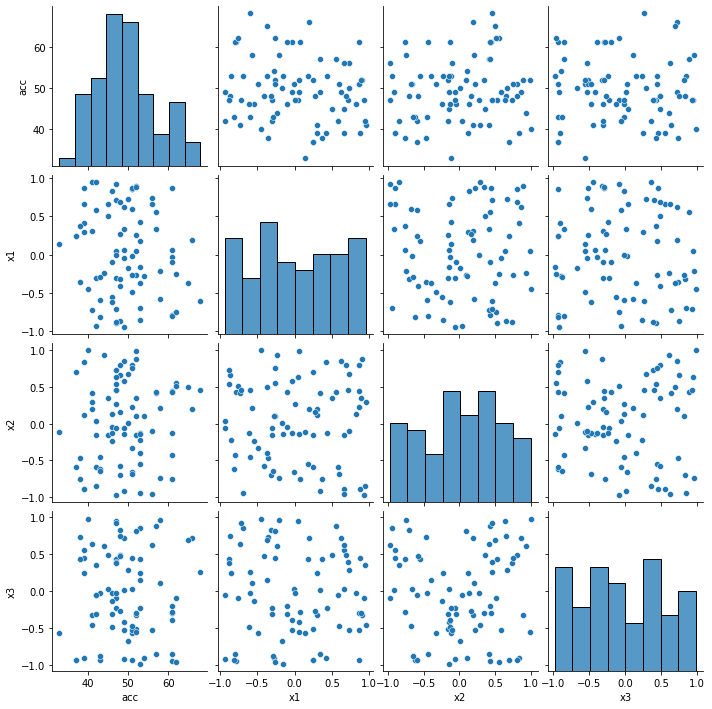

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

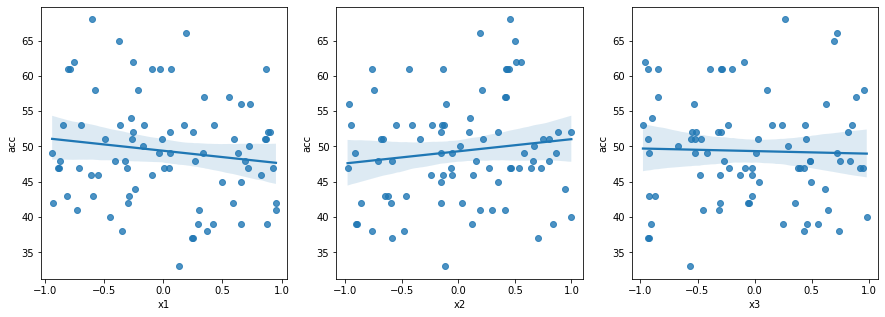

In [ ]:
# 라. 상관관계 분석
print(train_set[['acc','x1','x2','x3']].corr())
print("------------------------------")
plt.figure(figsize=(5,5))
sns.heatmap(data=train_set[['acc','x1','x2','x3']].corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')
plt.show()

plt.figure(figsize=(10,10))
sns.pairplot(train_set[['acc','x1','x2','x3']])
plt.show()

# 마. 변수별 OLS 추정선
fig = plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(15,5)
sns.regplot('x1', 'acc', lowess=False, data = train_set, ax=ax1)
sns.regplot('x2', 'acc', lowess=False, data = train_set, ax=ax2)
sns.regplot('x3', 'acc', lowess=False, data = train_set, ax=ax3)

                            OLS Regression Results                            
Dep. Variable:                    acc   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9516
Date:                Sun, 19 Dec 2021   Prob (F-statistic):              0.420
Time:                        07:22:31   Log-Likelihood:                -279.73
No. Observations:                  82   AIC:                             567.5
Df Residuals:                      78   BIC:                             577.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.3275      0.833     59.226      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


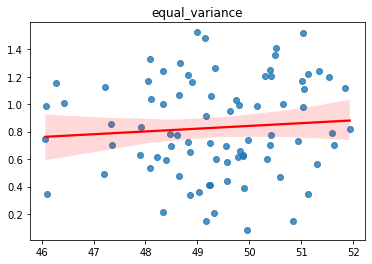

In [ ]:
# $$ 단순회귀분석

# 가. 회귀모형
reg_model = " acc ~ x1 + x2 + x3 "
reg_model_fit = smf.ols(reg_model, train_set).fit()
print(reg_model_fit.summary())
print("------------------------------")

# 나. 잔차분석
# 참고 https://mindscale.kr/course/basic-stat-python/14/
# 변수정의
fitted = reg_model_fit.predict(train_set) # 모형적합 추정값
residual = train_set['acc'] - fitted # 잔차(실제값 - 추정값)

# 다. 정규성 검정
# 표준화 잔차 정의
std_res = scipy.stats.zscore(residual)
# 표준화 잔차에 해당하는 좌표값
(x,y) = scipy.stats.probplot(std_res, fit = False)

# 정규성 검정 통계량 : 샤피로 윌크스 람다
shapiro = scipy.stats.shapiro(residual)
print(f'샤피로 윌크르 람다 : {shapiro}')
print("------------------------------")

# 라. 등분산성 그래프
sns.regplot(fitted, np.sqrt(np.abs(std_res)), lowess=False, line_kws={'color': 'red'})
plt.title("equal_variance")

# 마. 다중공선성
vif = pd.DataFrame()
train_x = train_set[['x1','x2','x3']]
vif["VIF Factor"] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif["features"] = train_x.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)       
print(vif)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'noramlity test')

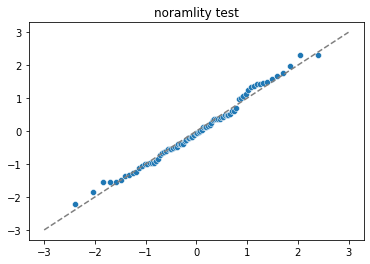

In [ ]:
# 정규성검정 그래프
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.title("noramlity test")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'residual analysis')

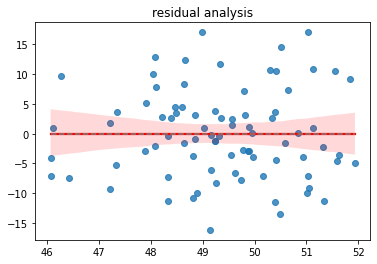

In [ ]:
# 잔차분석 그래프
sns.regplot(fitted, residual, lowess=False, line_kws={'color':'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--', color='grey')
plt.title("residual analysis")

In [ ]:
# (참고) 절편이 없는 회귀분석 계수 산출값 비교
# 가. 선형회귀 모형
reg_model_zero = " acc ~ x1 + x2 + x3 -1 " # 절편 제거
reg_model_zero_fit = smf.ols(reg_model_zero, train_set).fit()
print(reg_model_zero_fit.summary())
print("------------------------------")

# 나. 정사형 메트릭스 활용
X = train_set.iloc[:,1:4]
y = train_set.iloc[:,0:1]
beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta)

                                 OLS Regression Results                                
Dep. Variable:                    acc   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.030
Method:                 Least Squares   F-statistic:                             0.2079
Date:                Sun, 19 Dec 2021   Prob (F-statistic):                       0.891
Time:                        07:22:42   Log-Likelihood:                         -436.68
No. Observations:                  82   AIC:                                      879.4
Df Residuals:                      79   BIC:                                      886.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# $$ 포아송 휘귀분석
# 참고 사이트 : https://timeseriesreasoning.com/contents/negative-binomial-regression-model/

# 가. 독립변수 및 종속변수 정의
model = " acc ~ x1 + x2 + x3 "
# 개발데이터 변수 정의
y_train, X_train = dmatrices(model, train_set, return_type = 'dataframe')
# 테스트데이터 변수 정의
y_test, X_test = dmatrices(model, test_set, return_type = 'dataframe')
print(y_train.head(3))
print("------------------------------")
print(X_train.head(3))

    acc
0  42.0
1  66.0
2  50.0
------------------------------
   Intercept        x1        x2        x3
0        1.0 -0.929444  0.031052 -0.055024
1        1.0  0.192897  0.194481  0.725021
2        1.0 -0.169364  0.011686 -0.669170


In [ ]:
# 나. 포아송회귀 람다 추정
poisson_train_fit = sm.GLM(y_train, X_train, family = sm.families.Poisson()).fit()
print(poisson_train_fit.summary())
print("------------------------------")
print("각 관측치별 포아송회귀 람다 추정값")
print(poisson_train_fit.mu)
print("------------------------------")
print('추정된 람다 개수 : ',len(poisson_train_fit.mu))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                   82
Model:                            GLM   Df Residuals:                       78
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -279.27
Date:                Sun, 19 Dec 2021   Deviance:                       88.778
Time:                        07:22:51   Pearson chi2:                     89.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8981      0.016    246.977      0.0

In [ ]:
# 다. 알파 추정 (알파 : 람다의 계수)

# 람다 추정값 컬럼 추가
train_set['lambda_i'] = poisson_train_fit.mu
# 알파 곱하기 람다 추정값 컬럼 추가
train_set['alpha_dot_lambda'] = train_set.apply(lambda x : ((x['acc'] - x['lambda_i'])**2 - x['lambda_i']) / x['lambda_i'], axis=1)
print(train_set.head(3))
print("------------------------------")

# 알파 추정을 위한 회귀식 : 절편 없는 회귀식
alpha_OLS_model = " alpha_dot_lambda ~ lambda_i - 1 "
alpha_OLS_model_fit = smf.ols(alpha_OLS_model, train_set).fit()
print('alpha 추정값 : ', alpha_OLS_model_fit.params)
print("------------------------------")
print('alpha t 값 : ', alpha_OLS_model_fit.tvalues)
print("------------------------------")
print(alpha_OLS_model_fit.summary())

   acc        x1        x2        x3  cnt   lambda_i  alpha_dot_lambda
0   42 -0.929444  0.031052 -0.055024    1  51.058053          0.606962
1   66  0.192897  0.194481  0.725021    1  48.958862          4.931518
2   50 -0.169364  0.011686 -0.669170    1  49.937584         -0.999922
------------------------------
alpha 추정값 :  lambda_i    0.00182
dtype: float64
------------------------------
alpha t 값 :  lambda_i    0.602995
dtype: float64
------------------------------
                                 OLS Regression Results                                
Dep. Variable:       alpha_dot_lambda   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.3636
Date:                Sun, 19 Dec 2021   Prob (F-statistic):                       0.548
Time:                        07:22:54   Log-Likelihood:                         -140.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# [질문] : 알파값을 계산식으로 구한 값 --- 회귀모형으로 추정한 값과 다름
train_set['alpha'] = train_set['alpha_dot_lambda'] /  train_set['lambda_i']
train_set['alpha'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.001678996085623721

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                   82
Model:                            GLM   Df Residuals:                       78
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -279.12
Date:                Sun, 19 Dec 2021   Deviance:                       81.419
Time:                        07:40:29   Pearson chi2:                     81.7
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8981      0.016    236.596      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


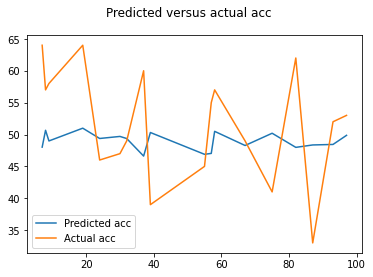

In [ ]:
# $$ 음이항 회귀

# 가. 개발데이터를 적용한 음이항 회귀모형
NB_model_fit = sm.GLM(y_train, X_train, family = sm.families.NegativeBinomial(alpha = alpha_OLS_model_fit.params[0])).fit()
print(NB_model_fit.summary())
print("------------------------------")

# 나. 테스트 데이터를 적용한 음이항 회귀 추정결과 
NB_predic = NB_model_fit.get_prediction(X_test)
prediction_summary_frame = NB_predic.summary_frame()
print(prediction_summary_frame.head(3))
print("------------------------------")

# 다. 음이항 회귀결과 적용
fig=plt.figure()
fig.suptitle("Predicted versus actual acc")

# 테스트 데이터를 음이항 회귀모형에 적용한 acc 추정값
predicted_acc = prediction_summary_frame['mean']

# 테스트 데이터 acc 실제값
actual_acc = y_test['acc']

# 테스트 셋에 예측값 및 실제값 추가
test_set['predicted_acc'] = predicted_acc
test_set['actual_acc'] = actual_acc
print(test_set.head(3))
print("------------------------------")

# 라. 예측값 대비 실제값 그래프
# 예측값
predicted, = plt.plot(X_test.index, predicted_acc, label='Predicted acc') 
# 실제값
actual, = plt.plot(X_test.index, actual_acc, label='Actual acc')
# 범례
plt.legend(handles=[predicted, actual])
plt.show()

[참고] 음이항 회귀모형 다른 코드 (수업시간 자료)

In [ ]:
# 독립변수 및 베르누이 변수 생성

# 가. 데이터 사이스 설정
n = int(1e+5)
p = 1

# 나. x변수 생성 : 정규분포 난수
features_Brn = tf.random.normal((n,p), dtype = tf.float32)
print("features")
print(type(features_Brn))
print(features_Brn[:3])
print("------------------------------")

# 다. y 변수 생성 : 베르누이분포 난수
labels_Brn = tfp.distributions.Bernoulli(logits=1.5 * features_Brn).sample() # y변수 생성
# [질문] logits=1.5로 설정하는 이유?
labels_Brn = tf.cast(labels_Brn, dtype=tf.float32) # float 로 형변환
labels_Brn = tf.squeeze(labels_Brn) # [100000,1] 을 [100000] 으로 변경
labels_Brn = labels_Brn.numpy()
print("labels")
print(labels_Brn.shape)
print(labels_Brn[:3])
print("------------------------------")

# 라. y 분포 탐색
df_Brn=pd.DataFrame(labels_Brn)
df_Brn['cnt']=1
df_Brn=df_Brn.rename(columns={0:'event'})
df_Brn_pivot = df_Brn.pivot_table(index='event',values='cnt',aggfunc='sum')
print(df_Brn_pivot)
print("------------------------------")

# 바. 베르누이분포로 logits 재추정 [질문] 왜 하는지??)
Bernoulli_model = tfp.glm.Bernoulli()
# Fit model given data.
coeffs_Brn, linear_response, is_converged, num_iter = tfp.glm.fit(    
    model_matrix=features_Brn, # x
    response=labels_Brn, # y
    model=Bernoulli_model) # 베르누이
print('coeffs_Brn : ', coeffs_Brn)


features
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[ 0.10220536]
 [-0.15739141]
 [ 0.58507115]], shape=(3, 1), dtype=float32)
------------------------------
labels
(100000,)
[1. 0. 1.]
------------------------------
         cnt
event       
0.0    49883
1.0    50117
------------------------------
coeffs_Brn :  tf.Tensor([1.4979517], shape=(1,), dtype=float32)


In [ ]:
# $$ 음이항 회귀 Pretend to load synthetic data set.

# 가. 데이터 사이스 설정
np.random.seed(1)
n_NB = int(1e+6)
p_NB = 1
alpha_NB = 0.2 # [질문] 왜 0.2 인가?

# 나. 독립변수 생성 : 정규분포 난수
x_NB = np.random.normal(size=(n_NB, p_NB))
beta_NB = np.random.normal(size=(p_NB, 1))
print('beta_NB :', beta_NB)
features_NB = tf.cast(tf.matmul(x_NB, beta_NB), dtype = tf.float32)
features_NB = features_NB + tf.math.log(alpha_NB)
print("features")
print(type(features_NB))
print(features_NB[:3])
print("------------------------------")

# 다. 종속변수 생성 : 음이항 분포 이용
# 실패회수 10회
n_fail = 10

# 음이항회귀모형
labels_NB = tfp.distributions.NegativeBinomial(total_count = 1/alpha_NB, logits=features_NB).sample()
labels_NB = tf.squeeze(labels_NB)
y_NB = labels_NB.numpy()
print("labels_NB")
print(labels_NB.shape)
print(labels_NB[:3])
print("------------------------------")

# 라. 음이항 회귀모형 적합
NB_model = sm.GLM(y_NB, x_NB, family = sm.families.NegativeBinomial())
# Fit model given data.
NB_model_fit = NB_model.fit()
print(NB_model_fit.summary())
print("------------------------------")
print('beta_NB : ', beta_NB)
print('NB_model_fit.params : ', NB_model_fit.params)
print('NB_model_fit.fittedvalues : ', NB_model_fit.fittedvalues)
print('NB_model_fit.scale : ', NB_model_fit.scale)
print('NB_model_fit.bse : ', NB_model_fit.bse)

beta_NB : [[-0.95137397]]
features
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[-3.1547978]
 [-1.0274289]
 [-1.1069491]], shape=(3, 1), dtype=float32)
------------------------------
labels_NB
(1000000,)
tf.Tensor([1. 3. 0.], shape=(3,), dtype=float32)
------------------------------
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:              1000000
Model:                            GLM   Df Residuals:                   999999
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4675e+06
Date:                Sat, 18 Dec 2021   Deviance:                   6.5653e+05
Time:                        07:34:14   Pearson chi2:                 5.98e+05
No. Iterations:                     5                          